In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("twitter_training.csv")

In [3]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
col_names=['ID','Entity','Sentiments','Contest']
df=pd.read_csv("twitter_training.csv", names=col_names)

In [5]:
df.head()

,ID,Entity,Sentiments,Contest
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
df.shape

(74682, 4)

In [8]:
df.describe

<bound method NDFrame.describe of          ID       Entity Sentiments                                            Contest
0      2401  Borderlands   Positive  im getting on borderlands and i will murder yo...
1      2401  Borderlands   Positive  I am coming to the borders and I will kill you...
2      2401  Borderlands   Positive  im getting on borderlands and i will kill you ...
3      2401  Borderlands   Positive  im coming on borderlands and i will murder you...
4      2401  Borderlands   Positive  im getting on borderlands 2 and i will murder ...
...     ...          ...        ...                                                ...
74677  9200       Nvidia   Positive  Just realized that the Windows partition of my...
74678  9200       Nvidia   Positive  Just realized that my Mac window partition is ...
74679  9200       Nvidia   Positive  Just realized the windows partition of my Mac ...
74680  9200       Nvidia   Positive  Just realized between the windows partition of...
74681  9200       Nvidia   Positive  Just like the windows partition of my Mac is l...

[74682 rows x 4 columns]>

In [9]:
df.isnull().sum()

,0
ID,0
Entity,0
Sentiments,0
Contest,686


In [10]:
df.dropna(axis=0,inplace=True)

In [11]:
df.isnull().sum()

,0
ID,0
Entity,0
Sentiments,0
Contest,0


In [13]:
df.duplicated().sum()

2340

In [14]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [15]:
df.shape

(71656, 4)

In [16]:
sentiment_counts=df['Sentiments'].value_counts()
sentiment_counts

,count
Sentiments,
Negative,21698
Positive,19713
Neutral,17708
Irrelevant,12537


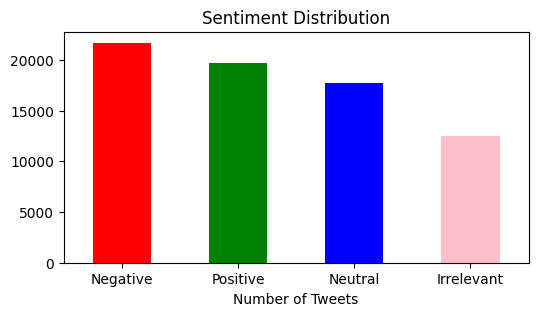

In [17]:
plt.figure(figsize=(6,3))
sentiment_counts.plot(kind='bar',color=['red','green','blue','pink'])
plt.title("Sentiment Distribution")
plt.xlabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

In [22]:
brand_data=df[df['Entity'].str.contains('Microsoft',case=False)]
brand_sentiment_counts=brand_data['Sentiments'].value_counts()
brand_sentiment_counts

,count
Sentiments,
Neutral,816
Negative,748
Positive,573
Irrelevant,167


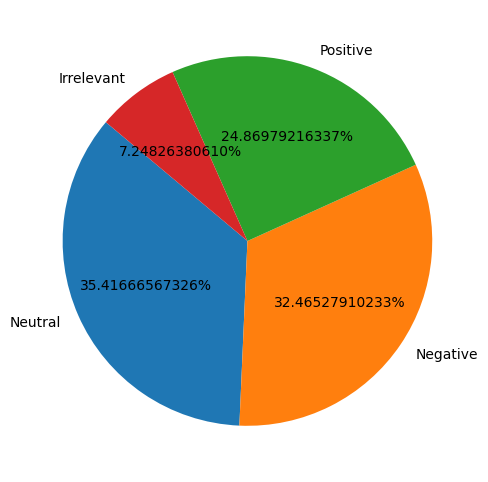

In [23]:
plt.figure(figsize=(6,6))
plt.pie(brand_sentiment_counts,labels=brand_sentiment_counts.index,autopct='%1.11f%%',startangle=140)
plt.show()